# Intermediate Example

This is a slightly more realistic network, capturing some key features of a real core metabolic network, with energy generation (both fermentation and respiration), biomass production and non-growth-associated maintenance. (Model made up by Daniel Segrè for teaching purpose)

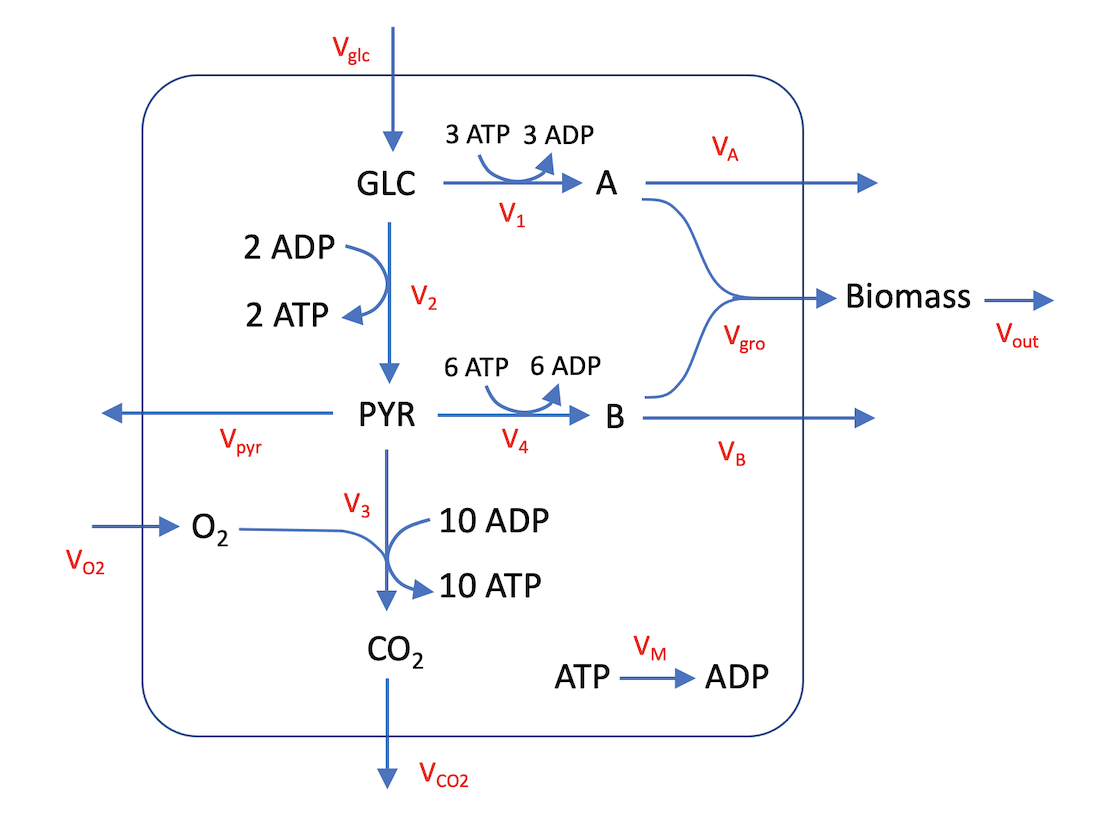

### Define Reaction Network

STOICHIOMETRIC MATRIX


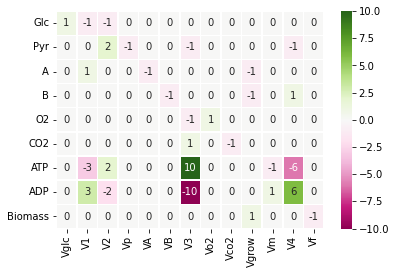

In [ ]:
reacs =["Vglc","V1","V2","Vp","VA","VB","V3","Vo2","Vco2","Vgrow","Vm","V4","Vf"]
metabs = ["Glc","Pyr","A","B","O2","CO2","ATP","ADP","Biomass"]

n = len(reacs)
m = len(metabs)

S=np.array([[1  , -1  ,  -1 ,    0  ,   0  ,   0  ,   0  ,   0  ,   0   ,  0  ,   0   ,  0   ,  0],
[0  ,  0   ,  2   , -1   ,  0   ,  0   , -1  ,   0  ,   0  ,   0   ,  0  ,  -1  ,   0],
[0  ,  1  ,   0   ,  0  ,  -1   ,  0  ,   0  ,   0  ,   0  ,  -1   ,  0   ,  0  ,   0],     
[0  ,  0  ,   0   ,  0   ,  0  ,  -1   ,  0  ,   0   ,  0  ,  -1   ,  0   ,  1  ,   0],    
[0  ,  0  ,   0   ,  0   ,  0   ,  0  ,  -1   ,  1   ,  0  ,   0   ,  0  ,   0   ,  0],     
[0  ,  0  ,   0   ,  0  ,   0   ,  0   ,  1   ,  0  ,  -1  ,   0   ,  0  ,   0   ,  0],     
[0  , -3  ,   2  ,   0  ,   0   ,  0   , 10  ,   0  ,  0   ,  0  ,  -1  ,  -6  ,  0],     
[0  ,  3  ,  -2  ,   0   ,  0   ,  0  , -10  ,   0  ,   0   ,  0  ,   1   ,  6  ,  0],    
[0  ,  0  ,   0  ,   0   ,  0   ,  0  ,   0   ,  0   ,  0   ,  1   ,  0   ,  0   , -1]])

print("STOICHIOMETRIC MATRIX")
colormap = sns.color_palette("Greens") 
sns.heatmap(S, annot=True,  linewidths=.5, xticklabels=reacs,yticklabels=metabs,cmap="PiYG")
plt.yticks(rotation=0) 
plt.show()

## Define optimization parameters

Define optimization parameters, i.e. flux lower bounds (LB) and upper bounds (UB), and objective function

In [ ]:
b=np.zeros(m) # Right-hand side of SV=0
obj=np.zeros(n) # Initialize Objective function vector to zero
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB=0*np.ones(n) # Set of lower bounds, initialize to zero
UB=LARGE*np.ones(n) # Set of upper bounds, initialize to LARGW

# Change flow through individual reaction
UB[0]=10
UB[7]=3

LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]

obj[12]=-1 # Define objective function. Default of optimizer is "minimize", so a -1 will lead to maximization
#obj[3]=-1
print("Objetive function:", obj)
#print(LBUB)
#print(S)
#print(S.shape)
#print(len(reacs))
#print(len(metabs))


Objetive function: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]


### Run LP to solve FBA

In [ ]:
print("IMPLEMENT OPTIMIZATION:")
options = {"disp": False}
solution = linprog(c=obj, A_eq=S, b_eq=b, bounds=LBUB, options=options) # max c*v, given Sv=b, LB < v <UB
#print(solution)

print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)

### Display Solution

Visualize Solution Vector

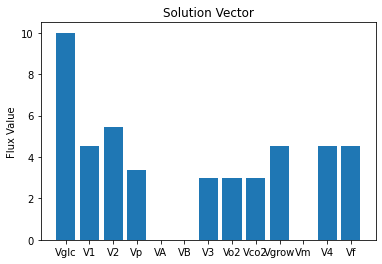

In [ ]:
v_pos = np.arange(n)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, reacs)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

### Print and visualize fluxes

Vglc[Flux = 10.0] :  ===>  1 Glc
V1[Flux = 4.55] :  1 Glc 3 ATP ===>  1 A 3 ADP
V2[Flux = 5.45] :  1 Glc 2 ADP ===>  2 Pyr 2 ATP
Vp[Flux = 3.36] :  1 Pyr ===> 
VA[Flux = 0.0] :  1 A ===> 
VB[Flux = 0.0] :  1 B ===> 
V3[Flux = 3.0] :  1 Pyr 1 O2 10 ADP ===>  1 CO2 10 ATP
Vo2[Flux = 3.0] :  ===>  1 O2
Vco2[Flux = 3.0] :  1 CO2 ===> 
Vy[Flux = 4.55] :  1 A 1 B ===>  1 Biomass
Vm[Flux = 0.0] :  1 ATP ===>  1 ADP
V4[Flux = 4.55] :  1 Pyr 6 ATP ===>  1 B 6 ADP
Vf[Flux = 4.55] :  1 Biomass ===> 


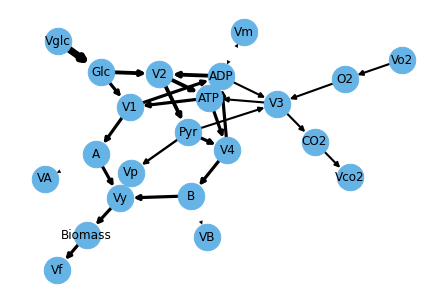

In [ ]:
pretty_print_fluxes(S,reacs,metabs,solution)
draw_network(S,reacs,metabs,solution)